#Initial Data Exploration
**Goal:** Understand the UFC dataset structure, identify data quality issues, and form initial hypotheses.

**Date:** 12/25/2025

In [3]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Display options
pd.set_option('display.max_columns',None) #Show all Columns
pd.set_option('display.max_rows',None) #Show up to 100 rows

#Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12,6)

print("Libraries Imported Successfully")


Libraries Imported Successfully


In [34]:
# Load ufc-master.csv into a DataFrame called 'df'
df = pd.read_csv('../data/raw/ufc-master.csv')

# Print a success message and show the shape
print("Dataset Loaded Successfully")
df.shape

Dataset Loaded Successfully


(6528, 118)

In [13]:
#Display the first 5 rows
print(df.head())

          RedFighter        BlueFighter  RedOdds  BlueOdds  RedExpectedValue  \
0  Alexandre Pantoja        Kai Asakura   -250.0     215.0           40.0000   
1  Shavkat Rakhmonov  Ian Machado Garry   -210.0     295.0           47.6190   
2         Ciryl Gane   Alexander Volkov   -380.0     300.0           26.3158   
3     Bryce Mitchell        Kron Gracie   -950.0     625.0           10.5263   
4      Nate Landwehr         Dooho Choi   -130.0     110.0           76.9231   

   BlueExpectedValue        Date                Location Country Winner  \
0              215.0  2024-12-07  Las Vegas, Nevada, USA     USA    Red   
1              295.0  2024-12-07  Las Vegas, Nevada, USA     USA    Red   
2              300.0  2024-12-07  Las Vegas, Nevada, USA     USA    Red   
3              625.0  2024-12-07  Las Vegas, Nevada, USA     USA    Red   
4              110.0  2024-12-07  Las Vegas, Nevada, USA     USA   Blue   

   TitleBout    WeightClass Gender  NumberOfRounds  BlueCurrentLoseS

##Initial Observations
- Both Categorical and Numerical Columns (need encoding)
- possibly need imputations for NaN

In [14]:
#Print the shape of the dataset
df.shape
#6528 rows, 118 columns

(6528, 118)

In [30]:
#Print all column names
print("All columns:")
print(df.columns)

# Count how many columns start with 'R_'
red_cols = [col for col in df.columns if col.startswith('R')] 
print(f"\nNumber of Red corner stats: {len(red_cols)}")

# Count how many columns start with 'B_'
blue_cols = [col for col in df.columns if col.startswith('B')]
print(f"Number of Blue corner stats: {len(blue_cols)}")

# Find columns that don't start with R_ or B_ (fight-level info)
no_color_cols = [col for col in df.columns if (col not in blue_cols and col not in red_cols)]
print(f"Number of Columns That Don't Start with R_ or B_: {len(no_color_cols)}")

All columns:
Index(['RedFighter', 'BlueFighter', 'RedOdds', 'BlueOdds', 'RedExpectedValue',
       'BlueExpectedValue', 'Date', 'Location', 'Country', 'Winner',
       ...
       'FinishDetails', 'FinishRound', 'FinishRoundTime', 'TotalFightTimeSecs',
       'RedDecOdds', 'BlueDecOdds', 'RSubOdds', 'BSubOdds', 'RKOOdds',
       'BKOOdds'],
      dtype='object', length=118)

Number of Red corner stats: 45
Number of Blue corner stats: 45
Number of Columns That Don't Start with R_ or B_: 28


In [20]:
# Display data types of all columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6528 entries, 0 to 6527
Columns: 118 entries, RedFighter to BKOOdds
dtypes: bool(1), float64(60), int64(43), object(14)
memory usage: 5.8+ MB
None


In [22]:
# Count missing values in each colum
print("Missing values per column:")
missing_count = df.isnull().sum()
print(missing_count)

# Calculate percentage of missing values
print("\nMissing values percentage:")
print((missing_count/ len(df)) * 100)

Missing values per column:
RedFighter                        0
BlueFighter                       0
RedOdds                         227
BlueOdds                        226
RedExpectedValue                227
BlueExpectedValue               226
Date                              0
Location                          0
Country                           0
Winner                            0
TitleBout                         0
WeightClass                       0
Gender                            0
NumberOfRounds                    0
BlueCurrentLoseStreak             0
BlueCurrentWinStreak              0
BlueDraws                         0
BlueAvgSigStrLanded             930
BlueAvgSigStrPct                765
BlueAvgSubAtt                   832
BlueAvgTDLanded                 833
BlueAvgTDPct                    842
BlueLongestWinStreak              0
BlueLosses                        0
BlueTotalRoundsFought             0
BlueTotalTitleBouts               0
BlueWinsByDecisionMajority        0
B

In [28]:
#Analyze the 'Winner' column
print("Winner distribution (counts):")
winners = df['Winner'].value_counts()
print(winners)
print(f"\nTotal fights accounted for: {winners.sum()}")

# Check specifically for draws
draws_count = (df['Winner'] == 'Draw').sum()
print(f"\nNumber of draws: {draws_count}")

# Calculate percentages
print("\nWinner distribution (%):")
win_pct = df['Winner'].value_counts(normalize=True) * 100
print(win_pct.round(2))

# Breakdown by category
total = len(df)
red_wins = (df['Winner'] == 'Red').sum()
blue_wins = (df['Winner'] == 'Blue').sum()
draws = (df['Winner'] == 'Draw').sum()

print(f"\nDetailed breakdown:")
print(f"Red wins:  {red_wins:,} ({red_wins/total*100:.2f}%)")
print(f"Blue wins: {blue_wins:,} ({blue_wins/total*100:.2f}%)")
print(f"Draws:     {draws:,} ({draws/total*100:.2f}%)")
print(f"Total:     {red_wins + blue_wins + draws:,}")

Winner distribution (counts):
Winner
Red     3787
Blue    2741
Name: count, dtype: int64

Winner distribution (%):
Red Distribution: 58.01164215686274
Blue Win Distribution: 41.98835784313725


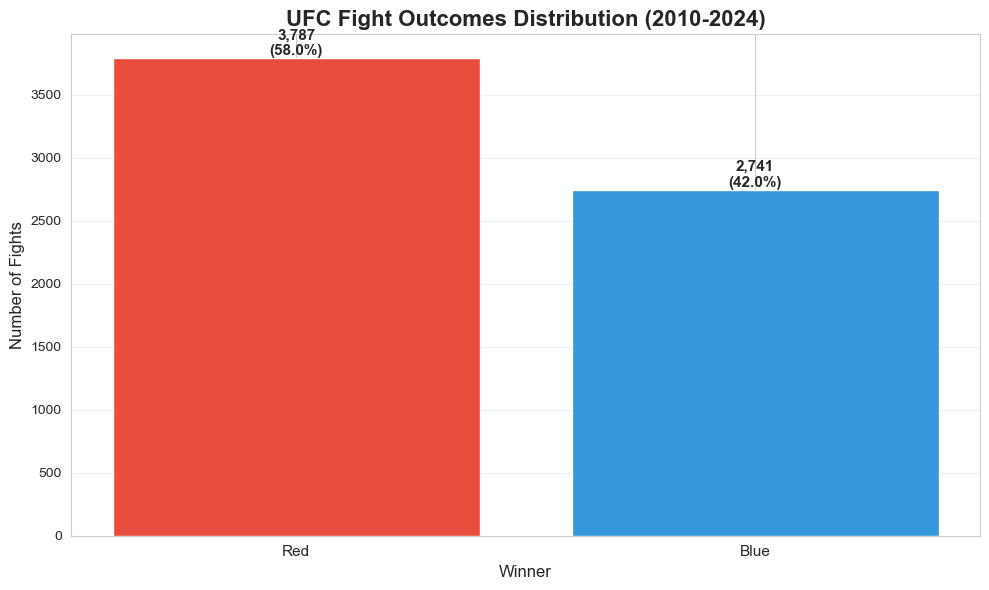


Red corner wins 1,046 more fights than Blue
This is a 38.2% advantage


In [35]:
# Visualize the winner distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
winner_counts = df['Winner'].value_counts()
colors = ['#e74c3c', '#3498db', '#95a5a6']  # Red, Blue, Gray for draws

bars = plt.bar(winner_counts.index, winner_counts.values, color=colors[:len(winner_counts)])
plt.title('UFC Fight Outcomes Distribution (2010-2024)', fontsize=16, fontweight='bold')
plt.xlabel('Winner', fontsize=12)
plt.ylabel('Number of Fights', fontsize=12)
plt.xticks(fontsize=11)

# Add count labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}\n({height/len(df)*100:.1f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n{'='*50}")
print(f"Red corner wins {winner_counts['Red'] - winner_counts['Blue']:,} more fights than Blue")
print(f"This is a {(winner_counts['Red']/winner_counts['Blue'] - 1)*100:.1f}% advantage")
print(f"{'='*50}")

In [31]:
# Find the earliest and latest fight dates
df['Date'] = pd.to_datetime(df['Date'])

print("Date range:")
print(f"Earliest fight: {df['Date'].min()}")
print(f"Latest fight: {df['Date'].max()}")

Date range:
Earliest fight: 2010-03-21 00:00:00
Latest fight: 2024-12-07 00:00:00


In [33]:
#Generate descriptive statistics for numeric columns
df.describe()

,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueLongestWinStreak,BlueLosses,BlueTotalRoundsFought,BlueTotalTitleBouts,BlueWinsByDecisionMajority,BlueWinsByDecisionSplit,BlueWinsByDecisionUnanimous,BlueWinsByKO,BlueWinsBySubmission,BlueWinsByTKODoctorStoppage,BlueWins,BlueHeightCms,BlueReachCms,BlueWeightLbs,RedCurrentLoseStreak,RedCurrentWinStreak,RedDraws,RedAvgSigStrLanded,RedAvgSigStrPct,RedAvgSubAtt,RedAvgTDLanded,RedAvgTDPct,RedLongestWinStreak,RedLosses,RedTotalRoundsFought,RedTotalTitleBouts,RedWinsByDecisionMajority,RedWinsByDecisionSplit,RedWinsByDecisionUnanimous,RedWinsByKO,RedWinsBySubmission,RedWinsByTKODoctorStoppage,RedWins,RedHeightCms,RedReachCms,RedWeightLbs,RedAge,BlueAge,LoseStreakDif,WinStreakDif,LongestWinStreakDif,WinDif,LossDif,TotalRoundDif,TotalTitleBoutDif,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,EmptyArena,BMatchWCRank,RMatchWCRank,RWFlyweightRank,RWFeatherweightRank,RWStrawweightRank,RWBantamweightRank,RHeavyweightRank,RLightHeavyweightRank,RMiddleweightRank,RWelterweightRank,RLightweightRank,RFeatherweightRank,RBantamweightRank,RFlyweightRank,RPFPRank,BWFlyweightRank,BWFeatherweightRank,BWStrawweightRank,BWBantamweightRank,BHeavyweightRank,BLightHeavyweightRank,BMiddleweightRank,BWelterweightRank,BLightweightRank,BFeatherweightRank,BBantamweightRank,BFlyweightRank,BPFPRank,FinishRound,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
count,6301.000000,6302.000000,6301.000000,6302.000000,6528,6528.000000,6528.000000,6528.000000,6528.000000,5598.000000,5763.000000,5696.000000,5695.000000,5686.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6073.000000,6171.000000,6171.000000,6171.000000,6161.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,5042.000000,1200.000000,1779.000000,96.000000,9.0,146.000000,154.000000,186.000000,184.000000,182.000000,191.000000,184.000000,177.000000,181.000000,188.000000,253.000000,73.000000,1.0,100.000000,107.000000,148.000000,120.000000,137.000000,119.000000,120.000000,124.000000,119.000000,130.000000,67.000000,5906.000000,5906.000000,5441.000000,5412.000000,5192.000000,5169.000000,5194.000000,5168.000000
mean,-115.711474,59.793240,96.658224,165.054566,2018-03-19 18:17:12.352941312,3.185509,0.501072,0.957567,0.023131,19.841810,0.453059,0.500202,1.320536,0.325419,1.923407,1.863664,11.872396,0.251685,0.017770,0.279871,1.093597,1.066330,0.626532,0.022212,3.145680,177.822068,182.162155,163.183977,0.622243,1.101562,0.031097,21.152766,0.460321,0.536907,1.399962,0.341467,2.679994,2.566789,17.408548,0.553462,0.026961,0.400888,1.612286,1.563879,0.934589,0.035539,4.628064,177.802399,182.410954,163.621324,30.359528,29.805607,0.059283,-0.143842,-0.756587,-1.482384,0.075061,-5.536152,-0.301777,-0.510876,-0.308058,-0.006679,-0.299271,0.096814,-2.663342,-0.071094,-0.171371,0.153114,8.339167,6.953345,7.291667,0.0,7.047945,7.097403,6.881720,7.119565,7.351648,7.130890,7.032609,6.983051,6.972376,6.590426,6.913043,8.410959,0.0,8.170000,8.476636,8.641892,8.483333,8.554745,8.386555,8.150000,7.967742,8.268908,8.407692,9.194030,2.424145,657.536234,308.333395,425.870288,884.048151,1100.497775,510.891606,636.463235
min,-2100.000000,-1200.000000,4.761900,8.333300,2010-03-21 00:00:00,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

## Key Findings from Initial Exploration

### Dataset Overview
- **Size**: 6,528 fights, 118 features
- **Date Range**: March 21, 2010 to December 7, 2024 (~14.7 years)
- **Target Variable**: Winner (Red/Blue/Draw)
- **Structure**: 45 Red features, 45 Blue features, 28 fight-level features

### Data Quality Assessment

**Excellent Quality (0% missing):**
- Fighter names (RedFighter, BlueFighter)
- Fight metadata (Date, Location, Country, Winner)
- Fighter records (Wins, Losses, Draws)
- Physical attributes (Height, Reach, Weight, Age)
- All differential features (pre-computed Red - Blue differences)

**Good Quality (3-15% missing):**
- **Betting odds**: 3.5% missing
  - RedOdds/BlueOdds: likely early UFC events before widespread betting
- **Fighter in-fight statistics**:
  - Red fighter: 5-7% missing (SigStr, TDs, etc.)
  - Blue fighter: 11-14% missing (more debut fighters in Blue corner)
  - Pattern: Blue corner has less experienced fighters

**Poor Quality (>50% missing - Consider Dropping):**
- **All ranking columns**: 96-99% missing
  - Only top 15 fighters per division are ranked
  - Most fighters unranked
  - **Decision**: Drop individual ranking columns, create "is_ranked" binary feature
  
**Meaningful Missingness (Expected):**
- **FinishDetails**: 56% missing
  - Missing when fight goes to decision (no finish method)
  - This is NOT a data quality issue - it's expected
- **EmptyArena**: 23% missing
  - COVID-era feature, older fights didn't track this
- **Method-specific odds** (KO/Sub/Dec odds): 16-21% missing
  - More granular betting markets, not always available

### Target Variable Analysis
- **Red wins**: 3,787 (58.0%)
- **Blue wins**: 2,741 (42.0%)
- **Draws**: [FILL IN AFTER FIX #2]
- **Class Imbalance**: Red wins 16% more often than Blue
  - **Possible explanations**:
    1. Favorites/more experienced fighters assigned to Red corner
    2. Home fighter traditionally in Red
    3. Psychological advantage of "Red corner"
  - **Implication for modeling**: May need to account for corner assignment or handle class imbalance

### Physical Attributes (from .describe())
- **Height**: 
  - Mean: 177.8cm both corners
  - Range: 152-211cm (5'0" to 6'11")
- **Reach**: 
  - Mean: 182cm both corners
  - Range: 0-214cm
  - **Data issue**: 0 reach is clearly an error - need to handle this
- **Weight**: 
  - Mean: 163lbs
  - Range: 115-265lbs (Strawweight to Heavyweight)
- **Age**:
  - Mean: Red=30.4 years, Blue=29.8 years
  - Range: 18-47 years

### Fighter Experience Comparison (Red vs Blue)

| Metric | Red Corner (Mean) | Blue Corner (Mean) | Difference |
|--------|-------------------|--------------------| -----------|
| Total Wins | 4.6 | 3.1 | +48% |
| Total Losses | 2.6 | 1.9 | +37% |
| Rounds Fought | 17.4 | 11.9 | +46% |
| Title Bouts | 0.55 | 0.25 | +120% |

**Key Insight**: Red corner consistently has MORE EXPERIENCED fighters across all metrics

### Initial Hypotheses for Modeling

1. **Experience matters**: More wins, rounds fought, title bouts → higher win probability
2. **Red corner advantage exists**: Not random assignment - favorites go to Red
3. **Betting odds are highly predictive**: Vegas odds likely strongest single predictor
4. **Physical advantages vary by division**: Reach matters more at heavyweight, speed at flyweight
5. **Debut fighters are risky**: Missing stats (especially Blue corner) = less data = higher uncertainty
6. **Fighting style matchups matter**: Striker vs grappler dynamics in the data

### Data Quality Issues to Address in Cleaning

1.  **Reach = 0**: Data errors need imputation or removal
2.  **Red corner bias**: Need to create "corner" feature or normalize
3.  **Ranking columns**: Drop (95%+ missing) or create binary "is_ranked"
4.  **Debut fighter stats**: Strategy needed for fighters with missing historical stats
5.  **Method-specific odds**: Decide if 20% missingness is acceptable or drop these features

### Next Steps for Step 2 (Deep EDA)

1. **Visualize distributions**: Histograms/boxplots for numeric features
2. **Correlation analysis**: Which features correlate with winning?
3. **Winner vs Loser comparison**: How do winners differ from losers?
4. **Temporal trends**: Has UFC changed over 14 years? (Fighter evolution, rule changes)
5. **Weight class analysis**: Do patterns differ by division?
6. **Betting odds accuracy**: How often does the favorite win?
7. **Feature importance proxy**: Identify most predictive features for modeling